+---------------+-----------------+
|         Driver|avg(Acceleration)|
+---------------+-----------------+
|  Tanooki Mario|             3.75|
|           Link|             3.25|
|          Yoshi|             3.75|
|Pink Gold Peach|             3.25|
|       Isabelle|             4.25|
|        Waluigi|             3.25|
|    Donkey Kong|             3.25|
|    Metal Mario|             3.25|
|           Iggy|              3.5|
|    Inkling (M)|             3.75|
|     Baby Mario|             4.25|
|          Wendy|             4.25|
|   Villager (F)|              4.0|
|          Larry|              4.0|
|         Lakitu|              4.0|
|       Rosalina|             3.25|
|      Dry Bones|             4.25|
|   Villager (M)|             3.75|
|   Koopa Troopa|              4.0|
|          Luigi|              3.5|
+---------------+-----------------+
only showing top 20 rows

+---------------+-----------------+
|         Driver|avg(Acceleration)|
+---------------+-----------------+
| 

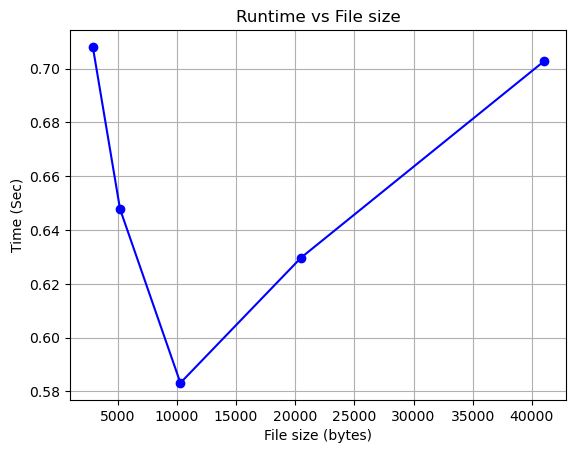

In [19]:
from pyspark.sql import SparkSession
import time
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("MYAPP").getOrCreate()

csv_path = ["gs://dataproc-staging-us-central1-823943063357-inh6zdl6/data/DRIVERS.csv", 
            "gs://dataproc-staging-us-central1-823943063357-inh6zdl6/data/DRIVERS2.csv", 
            "gs://dataproc-staging-us-central1-823943063357-inh6zdl6/data/DRIVERS3.csv", 
            "gs://dataproc-staging-us-central1-823943063357-inh6zdl6/data/DRIVERS4.csv", 
            "gs://dataproc-staging-us-central1-823943063357-inh6zdl6/data/DRIVERS5.csv"]
runtime = []

for f in csv_path :   
    start = time.time()

    df = spark.read.csv(f, header=True, inferSchema=True)

    df.groupBy('Driver').avg('Acceleration').show()

    end = time.time()

    total_time = end - start
    runtime.append(total_time)
    
data = {
    'Runtime': runtime,
    'Size': [2900, 5200, 10300, 20500, 41000]
}

# print(data)

plt.plot(data['Size'], data['Runtime'], marker='o', linestyle='-', color='b')
plt.title("Runtime vs File size")
plt.xlabel("File size (bytes)")
plt.ylabel("Time (Sec)")
plt.grid(True)

plt.show()
